In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# Saving and loading models

 ## Coding tutorials
 #### [1. Saving and loading model weights](#coding_tutorial_1)
 #### [2. Model saving criteria](#coding_tutorial_2)
 #### [3. Saving the entire model](#coding_tutorial_3)
 #### [4. Loading pre-trained Keras models](#coding_tutorial_4)
 #### [5. Tensorflow Hub modules](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Saving and loading model weights

#### Load and inspect CIFAR-10 dataset

The CIFAR-10 dataset consists of, in total, 60000 color images, each with one of 10 labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. For an introduction and a download, see [this link](https://www.cs.toronto.edu/~kriz/cifar.html).

In [78]:
# Import the CIFAR-10 dataset and rescale the pixel values

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Use smaller subset -- speeds things up
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

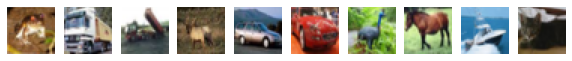

In [79]:
# Plot the first 10 CIFAR-10 images

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

#### Introduce two useful functions

In [4]:
# Introduce function to test model accuracy

def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [121]:
# Introduce function that creates a new instance of a simple CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, InputLayer

def get_new_model():
    model = Sequential([
        InputLayer(input_shape=(32, 32, 3)),
        Conv2D(filters=16, kernel_size=(3, 3), 
               activation='relu', name='conv_1'),
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
        MaxPooling2D(pool_size=(4, 4), name='pool_1'),
        Flatten(name='flatten'),
        Dense(units=32, activation='relu', name='dense_1'),
        Dense(units=10, activation='softmax', name='dense_2')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

#### Create simple convolutional neural network classifier

In [6]:
# Create an instance of the model and show model summary

model = get_new_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 8)         1160      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12576     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
____________________________________________________

In [7]:
# Test accuracy of the untrained model, around 10% (random)

get_test_accuracy(model, x_test, y_test)

accuracy: 0.109


#### Train model with checkpoints

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
# Create Tensorflow checkpoint object

checkpoint_path = "model_checkpoints/checkpoints"

checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_freq="epoch", 
                             verbose=True)

In [10]:
# Fit model, with simple checkpoint which saves (and overwrites) model weights every epoch

model.fit(x = x_train, y = y_train, 
          batch_size=100, 
          epochs=5, 
          verbose=1, 
          callbacks=[checkpoint])

Epoch 1/5
 96/100 [===========================>..] - ETA: 0s - loss: 2.1440 - accuracy: 0.1943
Epoch 00001: saving model to model_checkpoints/checkpoints
100/100 [==============================] - 1s 6ms/step - loss: 2.1371 - accuracy: 0.1988
Epoch 2/5
 96/100 [===========================>..] - ETA: 0s - loss: 1.7713 - accuracy: 0.3549
Epoch 00002: saving model to model_checkpoints/checkpoints
100/100 [==============================] - 1s 6ms/step - loss: 1.7696 - accuracy: 0.3564
Epoch 3/5
 93/100 [==========================>...] - ETA: 0s - loss: 1.6356 - accuracy: 0.4043
Epoch 00003: saving model to model_checkpoints/checkpoints
100/100 [==============================] - 1s 7ms/step - loss: 1.6380 - accuracy: 0.4040
Epoch 4/5
 94/100 [===========================>..] - ETA: 0s - loss: 1.5418 - accuracy: 0.4386
Epoch 00004: saving model to model_checkpoints/checkpoints
100/100 [==============================] - 1s 6ms/step - loss: 1.5448 - accuracy: 0.4379
Epoch 5/5
 95/100 [=========

In [11]:
# Have a look at what the checkpoint creates

! ls -lah model_checkpoints

total 192K
drwxr-xr-x 2 root root 4.0K Nov  3 11:12 .
drwxr-xr-x 1 root root 4.0K Nov  3 11:12 ..
-rw-r--r-- 1 root root   79 Nov  3 11:12 checkpoint
-rw-r--r-- 1 root root 174K Nov  3 11:12 checkpoints.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Nov  3 11:12 checkpoints.index


In [12]:
# Evaluate the performance of the trained model

get_test_accuracy(model, x_test, y_test)

accuracy: 0.462


#### Create new model, load weights

In [13]:
# Create a new instance of the (initialised) model, accuracy around 10% again

model = get_new_model()

get_test_accuracy(model, x_test, y_test)

accuracy: 0.107


In [14]:
# Load weights -- accuracy is the same as the trained model

model.load_weights(checkpoint_path)

get_test_accuracy(model, x_test, y_test)

accuracy: 0.462


#### Clear directory

In [15]:
! rm -r model_checkpoints

***
<a id="coding_tutorial_2"></a>
## Model saving criteria

#### Create more customised checkpoint

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [37]:
# Create Tensorflow checkpoint object with epoch and batch details

checkpoint_5000_path = "model_checkpoint_5000/checkpoint-{epoch:02d}"

checkpoint_5000 = ModelCheckpoint(filepath=checkpoint_5000_path, 
                                  verbose=1, 
                                  save_weights_only=True, 
                                  save_freq=500)

In [38]:
# Create and fit model with checkpoint

model = get_new_model()

model.fit(x = x_train, y = y_train, 
          batch_size=10, 
          epochs=3, 
          verbose=1,
          validation_data = (x_test, y_test) ,
          callbacks=[checkpoint_5000])

Epoch 1/3
 493/1000 [=============>................] - ETA: 1s - loss: 2.0667 - accuracy: 0.2371
Epoch 00001: saving model to model_checkpoint_5000/checkpoint-01
 990/1000 [============================>.] - ETA: 0s - loss: 1.9173 - accuracy: 0.2900
Epoch 00001: saving model to model_checkpoint_5000/checkpoint-01
1000/1000 [==============================] - 4s 4ms/step - loss: 1.9147 - accuracy: 0.2905 - val_loss: 1.7344 - val_accuracy: 0.3670
Epoch 2/3
 485/1000 [=============>................] - ETA: 1s - loss: 1.6150 - accuracy: 0.4165
Epoch 00002: saving model to model_checkpoint_5000/checkpoint-02
 984/1000 [============================>.] - ETA: 0s - loss: 1.5734 - accuracy: 0.4300
Epoch 00002: saving model to model_checkpoint_5000/checkpoint-02
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5706 - accuracy: 0.4312 - val_loss: 1.4869 - val_accuracy: 0.4600
Epoch 3/3
 490/1000 [=============>................] - ETA: 1s - loss: 1.4422 - accuracy: 0.4802
Epoch 000

In [40]:
# Have a look at what the checkpoint creates

! ls -lh model_checkpoint_5000

total 544K
-rw-r--r-- 1 root root   83 Nov  3 11:27 checkpoint
-rw-r--r-- 1 root root 174K Nov  3 11:26 checkpoint-01.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Nov  3 11:26 checkpoint-01.index
-rw-r--r-- 1 root root 174K Nov  3 11:26 checkpoint-02.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Nov  3 11:26 checkpoint-02.index
-rw-r--r-- 1 root root 174K Nov  3 11:27 checkpoint-03.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Nov  3 11:27 checkpoint-03.index


#### Work with model saving criteria

In [41]:
# Use tiny training and test set -- will overfit!

x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:100]
y_test = y_test[:100]

In [53]:
# Create a new instance of untrained model

model = get_new_model()

In [68]:
# Create Tensorflow checkpoint object which monitors the validation accuracy

checkpoint_best_path = "checkpoint_best/checkpoint"
checkpoint = ModelCheckpoint(filepath=checkpoint_best_path, 
                             monitor="val_accuracy", 
                             mode="max", 
                             save_best_only=True, 
                             save_weights_only=True, 
                             verbose=1)

In [69]:
# Fit the model and save only the weights with the highest validation accuracy

history = model.fit(x = x_train, y = y_train, 
                    epochs=50, 
                    validation_data=(x_test, y_test), 
                    batch_size=10, 
                    callbacks=[checkpoint],
                    verbose=False)


Epoch 00001: val_accuracy improved from -inf to 0.05000, saving model to checkpoint_best/checkpoint

Epoch 00002: val_accuracy did not improve from 0.05000

Epoch 00003: val_accuracy improved from 0.05000 to 0.06000, saving model to checkpoint_best/checkpoint

Epoch 00004: val_accuracy did not improve from 0.06000

Epoch 00005: val_accuracy improved from 0.06000 to 0.09000, saving model to checkpoint_best/checkpoint

Epoch 00006: val_accuracy improved from 0.09000 to 0.12000, saving model to checkpoint_best/checkpoint

Epoch 00007: val_accuracy did not improve from 0.12000

Epoch 00008: val_accuracy improved from 0.12000 to 0.13000, saving model to checkpoint_best/checkpoint

Epoch 00009: val_accuracy did not improve from 0.13000

Epoch 00010: val_accuracy did not improve from 0.13000

Epoch 00011: val_accuracy improved from 0.13000 to 0.16000, saving model to checkpoint_best/checkpoint

Epoch 00012: val_accuracy did not improve from 0.16000

Epoch 00013: val_accuracy did not improve 

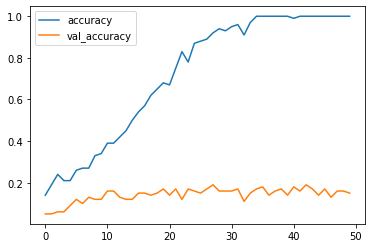

In [70]:
# Plot training and testing curves

import pandas as pd

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

In [71]:
# Inspect the checkpoint directory

! ls -lah checkpoint_best

total 192K
drwxr-xr-x 2 root root 4.0K Nov  3 11:41 .
drwxr-xr-x 1 root root 4.0K Nov  3 11:41 ..
-rw-r--r-- 1 root root   77 Nov  3 11:41 checkpoint
-rw-r--r-- 1 root root 174K Nov  3 11:41 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Nov  3 11:41 checkpoint.index


In [72]:
# Create a new model with the saved weights

model = get_new_model()

model.load_weights(filepath = checkpoint_best_path)

In [74]:
get_test_accuracy(model, x_test, y_test)

accuracy: 0.190


#### Clear directory

In [75]:
! rm -r model_checkpoints_5000 model_checkpoints_best

rm: cannot remove 'model_checkpoints_5000': No such file or directory
rm: cannot remove 'model_checkpoints_best': No such file or directory


***
<a id="coding_tutorial_3"></a>
## Saving the entire model

#### Create checkpoint that saves whole model, not just weights

In [139]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [140]:
# Create Tensorflow checkpoint object
checkpoint_full = "full_model_checkpoints"

checkpoint = ModelCheckpoint(filepath = checkpoint_full, verbose=True, save_weights_only=False, period=2)

In [141]:
# Create and fit model with checkpoint

model = get_new_model()

model.fit(x_train, 
          y_train, 
          verbose=2, 
          batch_size=100, 
          epochs=10, 
          callbacks=[checkpoint])

Epoch 1/10
100/100 - 1s - loss: 2.1346 - accuracy: 0.2215
Epoch 2/10

Epoch 00002: saving model to full_model_checkpoints
INFO:tensorflow:Assets written to: full_model_checkpoints/assets
100/100 - 1s - loss: 1.7852 - accuracy: 0.3561
Epoch 3/10
100/100 - 1s - loss: 1.6114 - accuracy: 0.4210
Epoch 4/10

Epoch 00004: saving model to full_model_checkpoints
INFO:tensorflow:Assets written to: full_model_checkpoints/assets
100/100 - 2s - loss: 1.5141 - accuracy: 0.4584
Epoch 5/10
100/100 - 1s - loss: 1.4519 - accuracy: 0.4757
Epoch 6/10

Epoch 00006: saving model to full_model_checkpoints
INFO:tensorflow:Assets written to: full_model_checkpoints/assets
100/100 - 1s - loss: 1.4034 - accuracy: 0.4966
Epoch 7/10
100/100 - 1s - loss: 1.3729 - accuracy: 0.5152
Epoch 8/10

Epoch 00008: saving model to full_model_checkpoints
INFO:tensorflow:Assets written to: full_model_checkpoints/assets
100/100 - 1s - loss: 1.3283 - accuracy: 0.5244
Epoch 9/10
100/100 - 1s - loss: 1.3103 - accuracy: 0.5314
Epoch 

#### Inspect what the checkpoint has created

In [125]:
# Have a look at what the checkpoint creates

! ls -lah full_model_checkpoints

total 136K
drwxr-xr-x 4 root root 4.0K Nov  3 12:10 .
drwxr-xr-x 1 root root 4.0K Nov  3 12:01 ..
drwxr-xr-x 2 root root 4.0K Nov  3 12:01 assets
-rw-r--r-- 1 root root 120K Nov  3 12:10 saved_model.pb
drwxr-xr-x 2 root root 4.0K Nov  3 12:10 variables


In [126]:
# Enter variables directory

! ls -lah full_model_checkpoints/variables

total 192K
drwxr-xr-x 2 root root 4.0K Nov  3 12:10 .
drwxr-xr-x 4 root root 4.0K Nov  3 12:10 ..
-rw-r--r-- 1 root root 177K Nov  3 12:10 variables.data-00000-of-00001
-rw-r--r-- 1 root root 2.2K Nov  3 12:10 variables.index


In [142]:
# Get the model's test accuracy

get_test_accuracy(model, x_test, y_test)

accuracy: 0.520


#### Create new model from scratch

In [134]:
# Delete model

del model

In [137]:
from tensorflow.keras.models import load_model

In [138]:
# Reload model from scratch

model = load_model(checkpoint_full)

get_test_accuracy(model, x_test, y_test)

accuracy: 0.123


#### Use the .h5 format to save model

In [143]:
# Save the model in .h5 format

model.save("my_model.h5")

In [149]:
# Inspect .h5 file

! ls -lah 

total 28K
drwxr-xr-x 1 root root 4.0K Nov  3 12:16 .
drwxr-xr-x 1 root root 4.0K Nov  3 10:36 ..
drwxr-xr-x 4 root root 4.0K Nov  3 12:12 AYUSH
drwxr-xr-x 2 root root 4.0K Nov  3 11:41 checkpoint_best
drwxr-xr-x 1 root root 4.0K Oct 28 16:30 .config
drwxr-xr-x 2 root root 4.0K Nov  3 11:27 model_checkpoint_5000
drwxr-xr-x 1 root root 4.0K Oct 28 16:30 sample_data


In [ ]:
# Delete model

del model

In [146]:
# Reload model from scratch

model1 = load_model("my_model.h5")

get_test_accuracy(model1, x_test, y_test)

accuracy: 0.087


#### Clear directory

In [148]:
! rm -r full_model_checkpoints
! rm my_model.h5

rm: cannot remove 'my_model.h5': No such file or directory


***
<a id="coding_tutorial_4"></a>
## Loading pre-trained Keras models

#### Import and build Keras ResNet50 model

Today we'll be using the ResNet50 model designed by a team at Microsoft Research, available through Keras applications. Please see the description on the [Keras applications page](https://keras.io/applications/#resnet) for details. If you continue using it, please cite it properly! The paper it comes from is:

Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun. "Deep Residual Learning for Image Recognition", 2015.

In the coding tutorial on Coursera, this model is loaded directly from disk. On Colab, you will load the model using the Keras API.

In [153]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 3s 0us/step


#### Import and preprocess 3 sample images

In [154]:
# Retrieve the image files

!wget -q -O lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ"
!wget -q -O viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
!wget -q -O water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

In [156]:
# Import 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img('lemon.jpg', target_size=(224, 224))
viaduct_img = load_img('viaduct.jpg', target_size=(224, 224))
water_tower_img = load_img('water_tower.jpg', target_size=(224, 224))

#### Use ResNet50 model to classify images

In [157]:
# Useful function: presents top 5 predictions and probabilities

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

##### Image 1: lemon

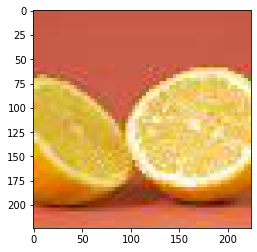

In [162]:
# Display image

plt.imshow(lemon_img)
plt.show()

In [163]:
# Display top 5 predictions

get_top_5_predictions(lemon_img)

,prediction,probability
1,consomme,0.227801
2,lemon,0.221758
3,eggnog,0.151335
4,ladle,0.0400883
5,spotlight,0.0291972


##### Image 2: viaduct

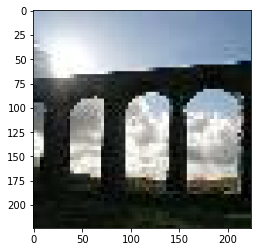

In [164]:
# Display image

plt.imshow(viaduct_img)
plt.show()

In [165]:
# Display top 5 predictions

get_top_5_predictions(viaduct_img)

,prediction,probability
1,vault,0.367951
2,prison,0.111742
3,viaduct,0.110738
4,window_screen,0.0882308
5,fire_screen,0.0206752


##### Image 3: water tower

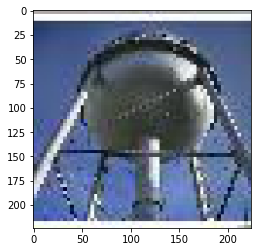

In [166]:
# Display image

plt.imshow(water_tower_img)
plt.show()

In [167]:
# Display top 5 predictions

get_top_5_predictions(water_tower_img)

,prediction,probability
1,solar_dish,0.384681
2,ladle,0.196179
3,planetarium,0.116682
4,strainer,0.04999
5,jigsaw_puzzle,0.0219474


***
<a id="coding_tutorial_5"></a>
## Tensorflow Hub modules

#### Import and build Tensorflow Hub MobileNet v1 model

Today we'll be using Google's MobileNet v1 model, available on Tensorflow Hub. Please see the description on the [Tensorflow Hub page](https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4) for details on it's architecture, how it's trained, and the reference. If you continue using it, please cite it properly! The paper it comes from is:

Andrew G. Howard, Menglong Zhu, Bo Chen, Dmitry Kalenichenko, Weijun Wang, Tobias Weyand, Marco Andreetto, Hartwig Adam: "MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications", 2017.

In the coding tutorial on Coursera, this model is loaded directly from disk. On Colab, you will load the model from TensorFlow Hub.

In [168]:
import tensorflow_hub as hub

In [169]:
# Build Google's Mobilenet v1 model

module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])

#### Use MobileNet model to classify images

In [170]:
# Retrieve the image files

!wget -q -O lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ"
!wget -q -O viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
!wget -q -O water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

In [171]:
# Import and preprocess 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img("lemon.jpg", target_size=(160, 160))
viaduct_img = load_img("viaduct.jpg", target_size=(160, 160))
water_tower_img = load_img("water_tower.jpg", target_size=(160, 160))

In [173]:
! touch imagenet_categories

In [175]:
# Read in categories text file

with open('imagenet_categories.txt') as txt_file:
    categories = txt_file.read().splitlines()

In [177]:
# Useful function: presents top 5 predictions

import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'],
                             index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
            
    return top_preds

##### Image 1: lemon

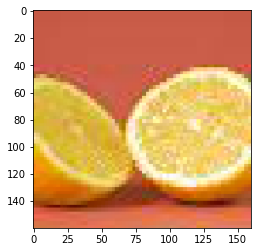

In [183]:
plt.imshow(lemon_img)
plt.show()

In [184]:
get_top_5_predictions(lemon_img)

,prediction
1,shower cap
2,tray
3,candle
4,brassiere
5,African chameleon


##### Image 2: viaduct

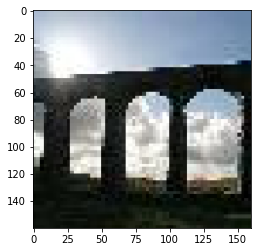

In [179]:
plt.imshow(viaduct_img)
plt.show()

In [180]:
get_top_5_predictions(viaduct_img)

,prediction
1,viaduct
2,pier
3,dam
4,prison
5,solar dish


##### Image 3: water tower

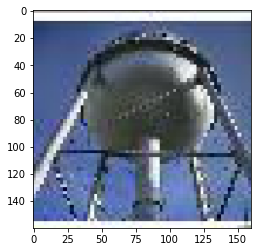

In [181]:
plt.imshow(water_tower_img)
plt.show()

In [182]:
get_top_5_predictions(water_tower_img)

,prediction
1,solar dish
2,water tower
3,aircraft carrier
4,jigsaw puzzle
5,oxygen mask
